In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# A selection of Software as a Service (SaaS) 2019 IPOs as recorded here: https://medium.com/@alexfclayton/2019-review-high-growth-saas-ipos-b393498463f7
tickers = ["BILL", "CRWD", "DDOG", "FSLY", "NET", "ZM"]
historical_data = yf.download(tickers, period="5y")

YF.download() has changed argument auto_adjust default to True


[                       0%                       ]

[                       0%                       ]

[**********************83%***************        ]  5 of 6 completed

[*********************100%***********************]  6 of 6 completed

In [3]:
historical_data.head()

Price           Close                                                          \
Ticker           BILL       CRWD       DDOG       FSLY        NET          ZM   
Date                                                                            
2020-03-23  37.290001  51.450001  32.900002  17.980000  21.410000  159.559998   
2020-03-24  41.360001  57.330002  34.490002  18.680000  22.410000  135.179993   
2020-03-25  41.110001  55.779999  33.689999  17.950001  21.660000  138.110001   
2020-03-26  41.230000  58.639999  34.299999  18.059999  21.600000  141.149994   
2020-03-27  38.799999  58.790001  34.549999  18.209999  21.959999  151.699997   

Price            High                                   ...       Open  \
Ticker           BILL       CRWD       DDOG       FSLY  ...       DDOG   
Date                                                    ...              
2020-03-23  38.438000  53.000000  34.099998  18.959999  ...  34.099998   
2020-03-24  41.740002  58.650002  35.389999  19.780001  ...  34.049999   
2020-03-25  42.980000  59.500000  36.889999  19.400000  ...  34.110001   
2020-03-26  45.959999  59.099998  35.930000  18.990000  ...  34.070000   
2020-03-27  40.200001  59.869999  35.240002  18.480000  ...  34.290001   

Price                                          Volume                     \
Ticker           FSLY        NET          ZM     BILL      CRWD     DDOG   
Date                                                                       
2020-03-23  18.000000  20.930000  141.996994  1307600  11127200  4407900   
2020-03-24  19.780001  22.040001  154.000000   520400   8088000  3495400   
2020-03-25  18.750000  22.059999  140.104996   786700   5517200  3049100   
2020-03-26  18.200001  21.700001  140.509995  1316600   5838700  4155000   
2020-03-27  17.580000  20.959999  145.699997  1724700   3826100  2892500   

Price                                   
Ticker         FSLY      NET        ZM  
Date                                    
2020-03-23  1912500  2276500  27681500  
2020-03-24  2383500  2577800  22401300  
2020-03-25  2103600  2660900  14743000  
2020-03-26  1095000  2290300   9252700  
2020-03-27  1180800  2787400  13271900  

[5 rows x 30 columns]

In [4]:
historical_data.tail()

Price           Close                                                       \
Ticker           BILL        CRWD        DDOG  FSLY         NET         ZM   
Date                                                                         
2025-03-14  46.419998  353.734985  101.800003  6.85  116.150002  74.199997   
2025-03-17  46.580002  364.829987  103.970001  7.25  116.019997  75.160004   
2025-03-18  46.939999  363.149994  102.930000  7.08  115.120003  75.449997   
2025-03-19  48.040001  375.049988  104.430000  7.11  117.580002  76.260002   
2025-03-20  47.950001  369.029999  103.169998  7.00  117.940002  76.029999   

Price            High                                  ...        Open         \
Ticker           BILL        CRWD        DDOG    FSLY  ...        DDOG   FSLY   
Date                                                   ...                      
2025-03-14  47.439999  354.500000  101.980003  6.9100  ...   99.580002  6.740   
2025-03-17  47.500000  370.859985  105.110001  7.4100  ...  101.589996  6.890   
2025-03-18  47.250000  368.467010  103.400002  7.2500  ...  103.239998  7.145   
2025-03-19  48.645000  381.260010  104.980003  7.3500  ...  103.110001  7.120   
2025-03-20  48.470001  377.489990  105.000000  7.0671  ...  103.980003  6.900   

Price                               Volume                             \
Ticker             NET         ZM     BILL     CRWD     DDOG     FSLY   
Date                                                                    
2025-03-14  115.389999  72.809998  3556400  4365500  4010700  1689900   
2025-03-17  115.669998  74.504997  2078900  4255100  4033800  3546200   
2025-03-18  115.480003  74.080002  1672700  3185600  2995200  2685800   
2025-03-19  115.760002  75.980003  1744800  4056600  3147800  2484000   
2025-03-20  117.629997  75.610001  1513393  2878453  4462879  2772849   

Price                         
Ticker          NET       ZM  
Date                          
2025-03-14  3266900  2192100  
2025-03-17  2793500  1773800  
2025-03-18  2447200  1728700  
2025-03-19  2976700  1690000  
2025-03-20  2475736  1394532  

[5 rows x 30 columns]

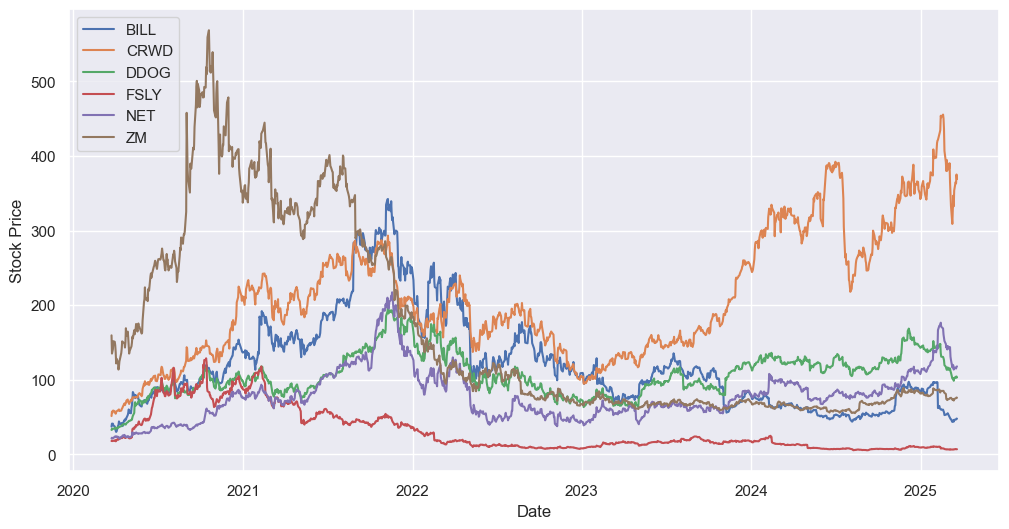

In [5]:
sns.set_theme()
plt.figure(figsize=(12, 6))
sns.lineplot(historical_data["Close"], dashes=False)
plt.legend(loc="upper left")
plt.ylabel("Stock Price");

Lots of interesting narrative here; Zoom's pandemic spike and subsequent crash; Crowdstrike's performance in spite of the huge 2024 outage; general underperformance of SaaS stocks since 2022 etc.

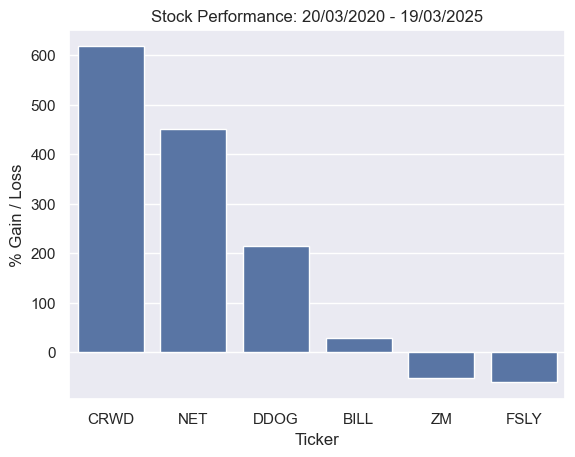

In [6]:
initial_close = historical_data.Close.iloc[0, :]
latest_close = historical_data.Close.iloc[-1, :]
gain_loss = (round(((latest_close - initial_close) / initial_close) * 100, 2))
gain_loss_df = pd.DataFrame({"Ticker": gain_loss.index, "Gain_Loss": gain_loss.values})
gain_loss_df.sort_values(by="Gain_Loss", ascending=False, inplace=True)

sns.barplot(data=gain_loss_df, x="Ticker", y="Gain_Loss").set_title("Stock Performance: 20/03/2020 - 19/03/2025")
plt.ylabel("% Gain / Loss");

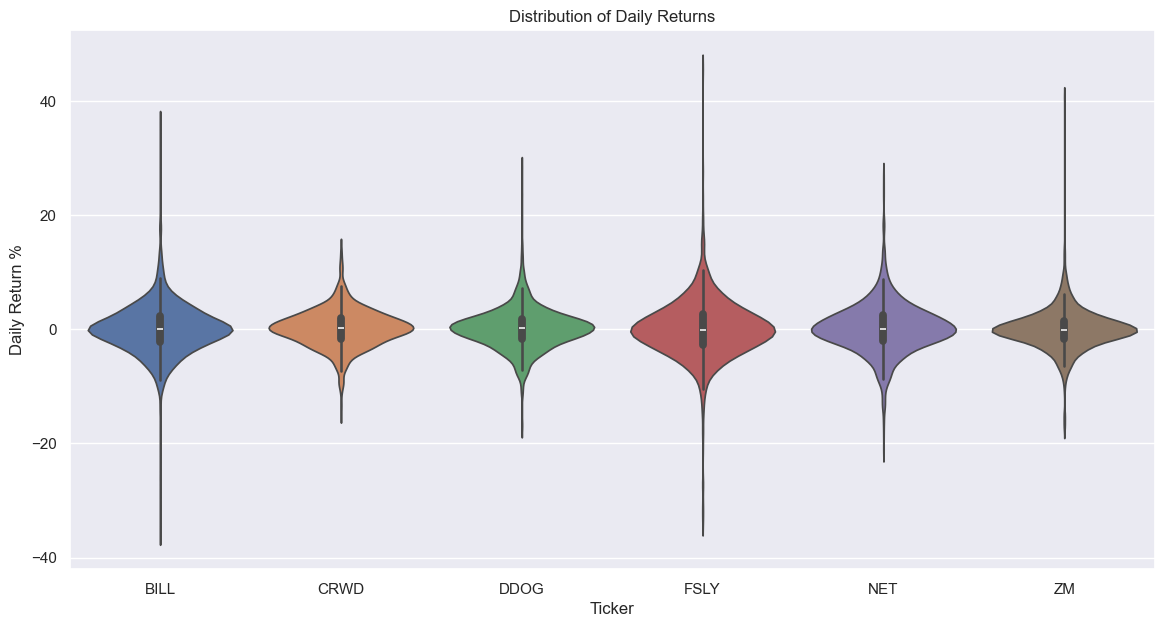

In [14]:
plt.figure(figsize=(14, 7))
sns.violinplot(historical_data["Close"].pct_change() * 100).set_title("Distribution of Daily Returns")
plt.ylabel("Daily Return %");